In [1]:
using Pkg; Pkg.activate("..")
using Revise
using Geom4hep

  Activating environment at `~/Development/VecGeom/Geom4hep/Project.toml`
┌ Info: Precompiling Geom4hep [eb5d0804-93e0-431a-a4d4-b4f95b95575a]
└ @ Base loading.jl:1342


In [2]:
# Defines two funstions to create geometry and generate image
include("XRay.jl")

# Contruct the geometry
world = buildGeom(Float64);

In [3]:
# Draw the geometry using Makie (GL)
using GLMakie
s = Scene()
draw(s, world)

GLMakie.Screen(...)

 10.880793 seconds (137.70 M allocations: 4.912 GiB, 8.72% gc time)


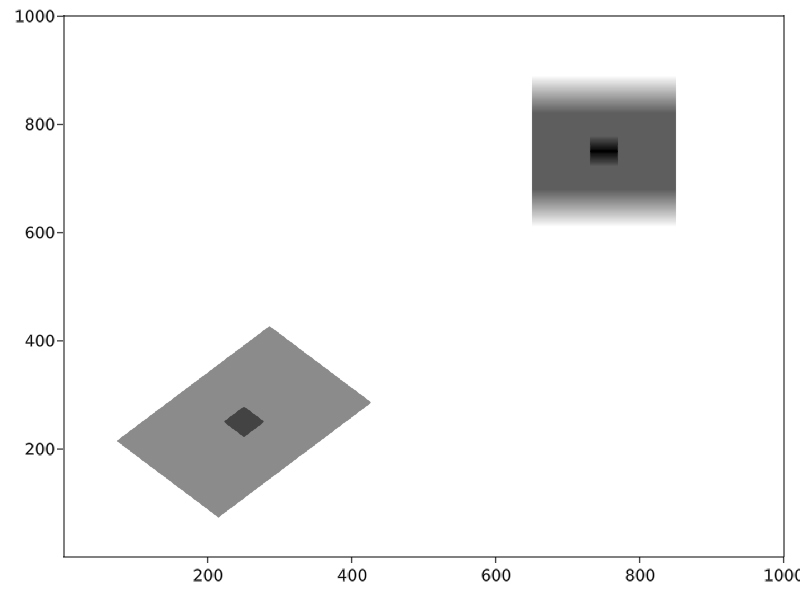

In [5]:
# produce the the X-ray and plot it
@time image = generateXRay(world, 1e6)
heatmap(image, colormap=:grayC)